In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install dlib (will take 10 or more minutes)
!apt update
!apt install -y cmake
!pip install dlib

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Fetched 261 kB in 2s (138 kB/s)
Reading package lis

In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import face_recognition

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


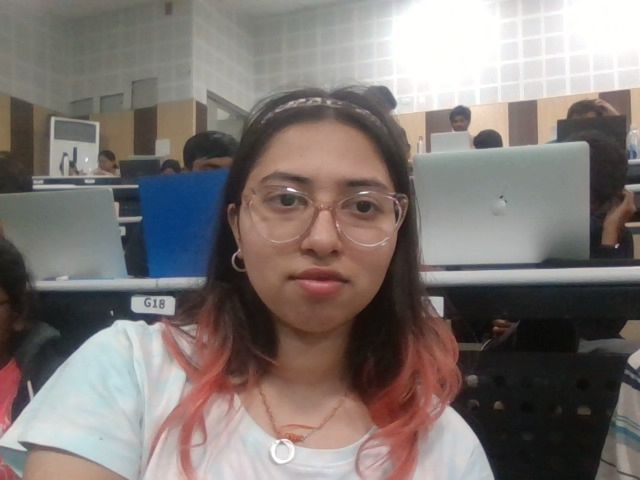

In [170]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [171]:
img2 = cv2.imread("photo.jpg")
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_encoding2 = face_recognition.face_encodings(rgb_img2)[0]

In [172]:
flag=0
# import the modules
import os
from os import listdir

# get the path or directory
folder_dir = "./family/"
for images in os.listdir(folder_dir):
# for images in os.listdir():

	# check if the image ends with jpeg
    if (images.endswith(".jpeg")):
        print(images)
        img = cv2.imread(images)
  #  print(img)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_encoding = face_recognition.face_encodings(rgb_img)[0]
        result = face_recognition.compare_faces([img_encoding], img_encoding2)
  #  print(result)
        if result == [True]:
      # print("hi")
            print(images[0:len(images)-5])#print name of file
            flag=flag+1
            break

if flag==0:
  print("Unregistered Driver")


sreeja.jpeg
orgho.jpeg
harinie.jpeg
Unregistered Driver


In [ ]:
img = cv2.imread("orgho.jpeg")
#  print(img)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_encoding = face_recognition.face_encodings(rgb_img)[0]
result = face_recognition.compare_faces([img_encoding], img_encoding2)
print("Result: ", result)

Result:  [False]
